### <p style="text-align: right;"> &#9989; Ariclenes Silva</p>

<img src="https://cmse.msu.edu/_cmse/assets/Image/CMSE-bigger.png"
     alt="CMSE Grapical Image"
     align="left" 
     height="82" 
     width="82" />

<br>

## __CMSE  201 - Spring 2019__

# Homework 4 - Building an Agent-Based Model for the Spread of Information in a City

**Connection to course-wide learning goals:**

* _Gain insight into physical, biological, and social systems through the use of computational algorithms and tools_.
    - Modeling the spread of information/rumors through a population using agent-based modeling.
* _Identify salient features of a system that be codified into a model_.
    - Different neighborhoods are used to model the same phenomenon, turning rules of interactions into an algorithm.
* _Manipulate, analyze, and visualize datasets and use this data to evaluate models_.
    - Create visualizations and animations of our system, interpret model behavior from these visualizations and note interesting results.
* _Have an understanding of basic numerical methods and be able to use them to solve problems_.
    - Using agent-based modeling to model a system.
* _Be able to take results from a scientific computing problem and present it both verbally and in writing_.
    - Describe and discuss the results of your models, comparing and contrasting models with different input parameters.

**Assignment-specific goals:**
* More practice with agent-based modeling
* Work on exploring different kinds of interactions in a model (i.e., using a Von Neumann neighborhood and a Moore neighborhood)
* Identifying and comparing the "tipping points" for different models

## Assignment instructions

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

**This assignment is due roughly three weeks from now at 11:59pm on Sunday, March 17th.** It should be uploaded into the "Homework Assignments" dropbox folder for Homework #4.  Submission instructions can be found at the end of the notebook.

## Grading


* Part 1: Basic model (29 points)
   
* Part 2: Improving the model (8 points)
   
* Part 3: Wrap up (3 points)

* Bonus -- Part 4: Challenge Problem (4 bonus points)

Total points possible: **40 (+4 bonus points)**
___

<img src="http://foolishwisdom.com/wp-content/uploads/2014/02/Gossip.jpg" alt="shocking rumor!" width=400px>

**Overview of the Assignment:**

In this homework, you will be continuing to learn about constructing agent-based models (ABM's) in a new and interesting context. So far in class, we have used ABM's to model the spread of a forest fire and social dynamics by constructing the Schelling model. Here, we are going to model the spread of information or a rumor through a population of people, which we will refer to as a city or a board in this assignment (we might use these terms interchangeably, but we are referring to the same thing). This model will introduce a few new concepts of building agent-based models. Namely, we will be working with different kinds of "neighborhoods." We will also be constructing a [_stochastic_](https://en.wikipedia.org/wiki/Stochastic) model if you so choose to work on the challenge problem at the end. Stochastic models are used [often when modeling scientific phenomena](https://en.wikipedia.org/wiki/Stochastic#Natural_science), so we felt that it would be a good idea to introduce this concept in the context of the model we are going to be building in this homework.  Basically, this means that our model is going to include a little bit of random numbers and probabilities in it. We haven't worked with random numbers in class yet, but don't worry, the focus of this assignment is going to be on the agent-based modeling. Any code using random numbers will be provided for you and explained so you can focus on further developing your understanding of ABM's.

## Background - What are we building?

At this point in your life, you have probably experienced the phenomena of how quickly information can spread from individual to individual. This could include:
* News travelling fast once a report has been released. People either see it on their news feed and share it on social media, which lead others to read it and perhaps do the same. Or, people talk about it in public settings, which lead others to search the piece of news on Google and read up on it.
* A rumor or piece of gossip is discussed openly. Someone overhears it and goes and tells other individuals. All of a sudden, everyone knows the hot gossip now!
* Within a circle of friends, drama between individuals can be discussed by others in the group. Like a game of telephone, the information can get distorted and now all of a sudden, people are mad about things that may have never happened or have been said.

These are just a few examples of what we are going to try and model in this assignment. **How can we describe the spread of information throughout a population of individuals? What can we learn from a model such as this?**

---
# 1. Basic Model - "Spreading like Wildfire" (29 points)

The first way we are going to try and model this phenomena is going to be very similar to how we modeled the forest fire in class. Good news, if you understood how we constructed this model and got it working in class, then this part of the assignment should go very quickly for you! If not, more good news: you get another opportunity to practice!

In this model, an individual who is "on fire" (knows the information) and spreads that "fire" (information) to the individuals surrounding them. Specifically, they spread this information to the neighboring individuals who are in their [_Von Neumann Neighborhood_](https://en.wikipedia.org/wiki/Von_Neumann_neighborhood). This refers to the individuals who are directly above, below, and to the right or left of a given person (as described by agents on a board). A diagram of this is given below.

<img src="https://i.imgur.com/TwcKZ0D.png" alt="vonneumann">

Here's what we need to do to build this model. These steps should look very familiar to what we did in class with the forest fire model.

1. We need to construct our city of individuals. There are **many** ways that we can do this. One possible solution would be to make a 2D NumPy array and fill it full of random numbers which range 0 to 1 (is there a NumPy tool we can use to do this quickly?). Once we have this array, we should change some of the values to 1 to represent people being there (how should we do this? Loops? Masking?). The rest of the values should be set to 0 to represent the lack of an individual. We'll talk more about this in the sections to come.
2. We're going to need to make a lot of visualizations of our city, so before we get going too far into this, let's also make a function to visualize our agents.
3. We are going to need some way of determining the neighbors of an individual.
    1. We first need a way to determine all of the neighboring indices of an individual in our city. These are going to be the possible individuals that they can interact with.
    2. Once we have all of those indices, we need to check to make sure they're "on the board" (in class, when we modeled the forest fire, we had to be careful with the edges of our array so we didn't reference indices that were off of the array).
4. We need the rumor or information to start somewhere. In the forest fire model, we designated an entire edge of the array as "on fire" and let it spread from there. In this model, we are going to start the rumor somewhere in the middle of the board at a single individual and let it spread from there.
5. Then we need to write some loops to update our board. Specifically, for each individual on the board, if they know the information, they need to spread it to those around them. We then have to repeat this process a number of times to represent some passage of time that we allow the information to spread (e.g., hours, days, weeks).


This sounds like a lot of work, but we are going to break this down piece by piece. If you have code from class that you think accomplished these tasks already, then feel free to copy and paste that here.

**Just make sure you make a note that you took the code from another notebook** (e.g., `##Taken from in-class day 11`).

In [96]:
## Here are some imports we are going to need in this assignment.
## Run this cell to load these libraries before going any further!

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
import time
from IPython.display import display, clear_output

## 1.1 Making a city (6 points)

**Do this:** Write a function which takes three arguments as inputs: width (# of columns), height (# of rows), and the percentage of the city that we want to be filled with people (the "people density") which we will represent as a decimal number between 0 and 1. The function should return a 2D NumPy array of 1's and 0's where a 1 represents a person and 0 represents empty space. The proportion of 1's to 0's on the board should be approximately equal to the input "people density" (we say proportional because random chance doesn't always yield _exact_ proportions).


There are several different ways which you can go about making this function, but we suggest one of the following two options:

1. You create a 2D NumPy array and fill it full of zeros. Once this array is created, loop through each element in the 2D array. For each element, generate a random number between 0 and 1 using the `random.uniform(0,1)` or something equivalent. We can think of this as rolling a dice, flipping a specifically weighted coin, or drawing a random number from a hat. We then compare that random number to our people density decimal. To illustrate this example, let's say our density is 0.40, which means we want 40% of our array to be 1's and 60% of the array to be 0's. For a given element in the array, once we have this randomly generated number, we compare it to our density. If it's _less than_ our people density, we set the value to a 1. If it's _greater than_ our density, we leave the value set to 0. This might be what you did for the forest fire model, so a method like this may sound familiar.

23. The other option would be to use the  `numpy.random.rand` function built into NumPy. Instead of making an array of 0's and rolling a dice to see which one we change to 1's, we make an array of the dice rolls (random numbers between 0 and 1). We can then either loop through the array and change the value of each element based on the specific roll, or we can use something like masking to bulk change rolls to 0's and 1's. This is a little bit more abstract of a method, but it will accomplish the same task that the previous solution will.


In either case, we need to use functions which deal with random numbers. We haven't talked about random numbers too much in class yet. For the purposes of this assignment, we won't be focusing on the random numbers themselves. Instead, we are going to utilize them for the purposes of making our model more realistic and just _assume_ that they are working properly. 

**Pick your favorite approach from the above 2 (or an entirely different approach if you want!) and write a function to generate our city/board based on the inputs we defined above.**

In [97]:
def making_a_city(width, height, density):
    the_city = np.zeros((width,height),dtype='int64')
    
    for r in range(width):
        for c in range(height):
            the_city[r,c]=np.random.choice(np.arange(0, 2), p=[abs(1-density), density])
                  
    return the_city

**Do This:** For each question below, you have been provided a code cell to write a few lines to test various aspects of your function. You do not need to include a markdown cell to explain your answers, but your code should clearly show that you've correctly acheived the task!

**1. Does your function return a 2D NumPy array?**

In [98]:
the_city=making_a_city(4, 4, 0.3)
print(the_city)

[[0 1 0 0]
 [1 0 0 0]
 [0 1 1 0]
 [0 0 0 1]]


**2. Is the shape the same as the shape you specified in your function?** _Remember, the "height" of an array corresponds to the number of rows and the "width" corresponds to the number of columns. If something went wrong, check the order of rows and columns you used in your function._

In [99]:
the_city.shape

(4, 4)

**3. Is the proportion of 1's (people) on your board to the number of 0's (empty space) _approximately_ close to what you set it as in your function? Does it get closer if you make the board bigger?**

In [100]:
np.count_nonzero(the_city==1)

print("The proportion of 1's (people) is",100*np.count_nonzero(the_city==1)/(np.count_nonzero(the_city==1)+np.count_nonzero(the_city==0)))
print("The proportion of 0's (empty space) is",100*np.count_nonzero(the_city==0)/(np.count_nonzero(the_city==1)+np.count_nonzero(the_city==0)))

The proportion of 1's (people) is 31.25
The proportion of 0's (empty space) is 68.75


**Make sure everything for setting up your board works as intended!**

Testing your code is really important! This function may seem insignificant, but it's critical that we set up our agents correctly. If this function doesn't work, you might run into issues later on in the assignment!

## 1.2 Making some visualization code (3 points)

**Do This:** Make a function to visualize your city (which you can create using your previous function). Use the `imshow` function to do this. If you are unfamiliar with `imshow` or forgot how it works, you might want to check out [this page](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html). **This function should take an array (the city/board) as an input. Also, choose a colormap that is *different than the default colormap***.

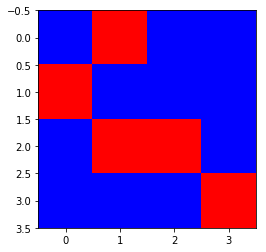

In [101]:
plt.imshow(the_city, cmap="bwr")

**Do This:** Test your visualization function by creating an array using your function from Part 1. You can decide the people density and the dimensions of your city. **Make sure you're using both of you functions here!**

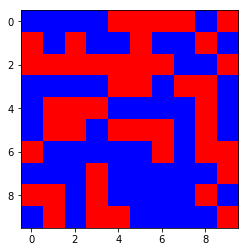

In [102]:
the_city=making_a_city(10, 10, 0.47)
plt.imshow(the_city, cmap="bwr")

## 1.3 Checking the Neighborhood (4 points)

**Do This:** Write two more functions.

1. The first should take an index `i` and and index `j` as well as a 2D NumPy array (our board, or city) and determine whether or not the index is "on the board." This refers to making sure that the specific `[i,j]` index pair is a real value that we can reference in our array. Since the size of your board can change, your code should be written generally such that we should be able to check an index on _any_ board. _Hint: What does the syntax "`if i >= 0 and i < board.shape[0]:`" check for?_

2. The second function should take an index `i` and an index `j` and our 2D NumPy array (our board or city) and return the **values** of the neighboring indices of `[i,j]`. This function should only return the neighbor _values_ for neighbors that are _on the board_. To do this, your previous function will need to be working. Some stub functions are provided below for you.

In [103]:
## Finish the code for this function
def onBoard(i, j, board):
    ##Taken from in-class day 12
    return True if i in range(0,board.shape[0]) and j in range(0,board.shape[1]) else False

In [104]:
## Finish the code for this function
def getNeighborValues(i, j, board):
    '''
    Function to get the **values** for the neighborhood of a given
    agent at [i,j]
    '''
    neighborhood_indices = [(i-1,j),(i,j-1),(i+1,j),(i,j+1)]
    
    ## We want to go through all of the indices and store the
    ## values in those locations as long as they are _on the board_
    neighborhood_values = []
    
    for index in neighborhood_indices:
        # Put your code here
        if onBoard(index[0],index[1],board):
            neighborhood_values.append(board[index])
    
    return neighborhood_values

Now that you have written your functions, you should write some code to test them. We have intentionally not outlined the tests that you should run here. After working in python these past few weeks and building several models, you should feel comfortable with writing some snippets of code to make sure things are working. Here are some ideas for how you might test these functions or what you might test for:

1. Does your `onBoard` function work in some extreme cases (e.g., the corners of the arrays, along an edge)?
2. Can you verify the neighborhood values of a particular `[i,j]` location? Do these neighborhood values match what you expect them to?

You are not _required_ to test this code, but it is in your best interest to make sure these functions are working properly before you move on. For your tests, make a very simple city/board that's, for example, 10x10 and has a people density of 10%. 

In [105]:
the_city=making_a_city(10, 10, 0.10)

##Taken from in-class day 11
print(onBoard(0,0,the_city) == True)
print(onBoard(0,1,the_city) == True)
print(onBoard(10,10,the_city) == False)
print(onBoard(223,223,the_city) == True)
print(onBoard(35,167,the_city) == True)
print(onBoard(225,-1,the_city) == False)
print(onBoard(-1,-1,the_city) == False)
print(onBoard(35,260,the_city) == False)
print(onBoard(35,225,the_city) == False)

##Taken from in-class day 11
print(getNeighborValues(0,0,the_city) == [0, 0])
print(getNeighborValues(225,225,the_city) == [])
print(getNeighborValues(221,123,the_city) == [0,0,0,0])
print(getNeighborValues(75,0,the_city) == [0,0,255])
print(getNeighborValues(125,57,the_city) == [255,255,255,255])
print(getNeighborValues(125,12,the_city) == [255,255,255,0])

True
True
True
False
False
True
True
True
True
True
True
False
False
False
False


## 1.4 Starting the Rumor - The beginning of the information (2 points)

In class, we started our forest fire by setting all of the trees on one side of the board on fire and then letting that spread from there. We are going to try something a little bit differently for this model. 

For the purposes of our work here, we are going to assume that an idea/piece of information/rumor originates from _somewhere_ in the middle region of our city/board. The function below, `startRumor`, takes a 2D array as an input and changes the value of one of the agents in the middle region to a 2. This signifies that individual knows the "rumor" or information of interest that is going to spread throughout our population.

Read through this function very carefully and make sure that you understand what the function does. Think about how the region is selected where the rumor will originate. How does it identify an agent in this region?

In [106]:
def startRumor(board):
    height, width = board.shape
    height_quarters = int(height/4)
    width_quarters = int(width/4)
    
    starting_middle_height_index = height_quarters
    ending_middle_height_index = 3*height_quarters
    
    starting_middle_width_index = width_quarters
    ending_middle_width_index = 3*width_quarters
    
    found_starting_point = False
    
    ##If the people density is low enough, we might not have
    ##an individual in this middle region. If that's the case, we
    ##are going to make a slight modification and just 
    ##place someone on the board who does know the information
    if np.all(board[starting_middle_height_index:ending_middle_height_index, starting_middle_width_index:ending_middle_width_index] == 0):
        i = random.randint(starting_middle_height_index, ending_middle_height_index)
        j = random.randint(starting_middle_width_index, ending_middle_width_index)
        board[i,j] = 2
        found_starting_point = True
    
    while not found_starting_point:
        i = random.randint(starting_middle_height_index, ending_middle_height_index)
        j = random.randint(starting_middle_width_index, ending_middle_width_index)
        
        if board[i,j] == 1:
            found_starting_point = True
            board[i, j] = 2

We are again using a function from the `random` library. We haven't talked about random numbers too much in class yet. For the purposes of this assignment, we won't be focusing on the random numbers themselves. Instead, we are going to utilize them for the purposes of making our model more realistic and just _assume_ that they are working properly. 

What the `random.randint` function does in the above cell is generates a random number in the range we give it. So, for example, `i = random.randint(starting_middle_height_index, ending_middle_height_index)`, will set the value of `i` to some number that is randomly selected in the range of indices that we have defined as the middle region of the board. The same is done for `j`. Effectively, those two lines of code pick a random location, `[i,j]`, in the region of the middle of the array. We then check what value the city/board has at this location. If it is a 1, then that means there is an individual in that location. They are chosen at the person who "starts the rumor," or the source of the information that is going to spread.

**Do This:** Using the function that you wrote to create a city/board and your code to visualize the city/board, let's make sure that this function works as well. 

1. Initialize a city/board that is 10x10 and has a density of people of 10%.
2. Visualize the city/board.
3. Run the `startRumor` function on your city/board.
4. Visualize it again to see that some change has been made to the board.

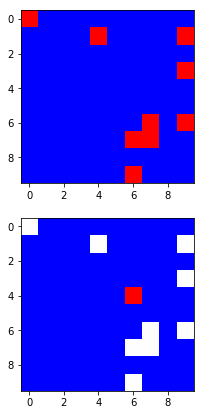

In [107]:
the_city=making_a_city(10, 10, 0.10)
plt.figure(figsize = (12,7))
plt.subplot(2, 1, 1)
plt.imshow(the_city, cmap="bwr")
startRumor(the_city)
plt.subplot(2, 1, 2)
plt.imshow(the_city, cmap="bwr")
plt.show()

## 1.5 Spreading the rumor (14 points)

Now that we have all of these functions working, let's start spreading the rumor. We will provide the pseudocode for this part of the assignment, but you will be responsible for writing the code. Here is the general idea for how we are going to model the spread of information in this part of the assignment:

```
make a copy of your city
for each index i for the number of rows:
    for each index j for the number of columns:
        if the value of the city/board at [i,j] is a 1:
            ##we only do something if we find a person
            ##who can learn the rumor
           
            
            get all of the values of their neighborhood cells
            ## we have a function to do this!
            
            
            if _any_ of the neighbors know the rumor change the
            value at that [i,j] location in the copy of your city to 2
            because that person now knows the rumor!
            ## there is more than one way to do this!
            ## You could use a loop to check all the neighbors and move one once you find one
            ## or you could check to see if there is a 2 in any of the neighbors
            

if the copy of our city is the same as city: 
    ##our simulation isn't changing anymore,
    ##so making a copy and updating it isn't going to
    ##lead to further changes
    stop the simulation
else:
    ##there are still changes going on
    set your new city to be the copy that has been updated

This is one iteration, repeat this some number of times
```

Here's what you will need to do for this part:

1. Initialize a city/board that has a width of 200 and a height of 100 and a people density of 40%.
2. Make a visualization of this city/board before the rumor starts.
3. Start the rumor using the `startRumor` function. 
4. Make sure that the rumor has been started by making another visualization of the city/board.
5. Implement the above psuedocode. The above pseudocode is **one** iteration of the model. You will run your model for **100** iterations (your model may finish earlier than 100 iterations, if it does, make sure you keep track of how many iterations it took!).
6. Show another visualization at the end of these iterations. As an added bonus (not for credit, but to make it look cool), if you run the following code at the end of each _iteration of your model_ (the end of each of the 100 repetitions of the above pseudocode), it will make an animation of the rumor spread. Note: all of the imports have been provided for you in the imports cell at the beginning of this assignment.

```python
fig = plt.figure(figsize = (12,7))
showCity(city) ##replace this function with the name of your visualization
               ##function
time.sleep(0.2)
clear_output(wait=True) # Clear output for dynamic display
display(fig)            # Reset display
fig.clear()             # Prevent overlapping and layered plots
plt.close();
```

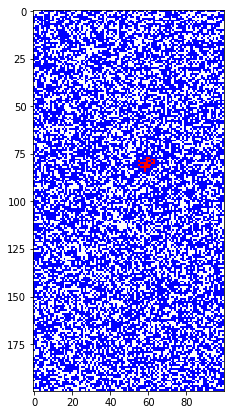

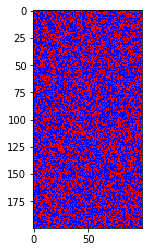

In [121]:
the_city=making_a_city(200, 100, 0.40)
plt.imshow(the_city, cmap="bwr")
startRumor(the_city)

def spread_rumor(the_city, iteration=None):
    if iteration==None:
        while True:
            copy_thecity=np.copy(the_city)

            for i in range(copy_thecity.shape[0]):
                for j in range(copy_thecity.shape[1]):
                    if copy_thecity[i,j]==1:
                        ##we only do something if we find a person
                        ##who can learn the rumor


                        get_the_neig=getNeighborValues(i,j,copy_thecity)
                        ## we have a function to do this!

                        if 2 in get_the_neig:
                            copy_thecity[i,j]=2

            if np.all(copy_thecity==the_city): 
                ##our simulation isn't changing anymore,
                ##so making a copy and updating it isn't going to
                ##lead to further changes
                break
            else:
                ##there are still changes going on
                #set your new city to be the copy that has been updated
                the_city=copy_thecity

            fig = plt.figure(figsize = (12,7))
            plt.imshow(the_city, cmap="bwr")
            time.sleep(0.2)
            clear_output(wait=True) # Clear output for dynamic display
            display(fig)            # Reset display
            fig.clear()             # Prevent overlapping and layered plots
            plt.close();
    else:
        for i in range(iteration):
            copy_thecity=np.copy(the_city)

            for i in range(copy_thecity.shape[0]):
                for j in range(copy_thecity.shape[1]):
                    if copy_thecity[i,j]==1:
                        ##we only do something if we find a person
                        ##who can learn the rumor


                        get_the_neig=getNeighborValues(i,j,copy_thecity)
                        ## we have a function to do this!

                        if 2 in get_the_neig:
                            copy_thecity[i,j]=2

            if np.all(copy_thecity==the_city): 
                ##our simulation isn't changing anymore,
                ##so making a copy and updating it isn't going to
                ##lead to further changes
                break
            else:
                ##there are still changes going on
                #set your new city to be the copy that has been updated
                the_city=copy_thecity

            fig = plt.figure(figsize = (12,7))
            plt.imshow(the_city, cmap="bwr")
            time.sleep(0.2)
            clear_output(wait=True) # Clear output for dynamic display
            display(fig)            # Reset display
            fig.clear()             # Prevent overlapping and layered plots
            plt.close();

spread_rumor(the_city, 100)

**Question:** How far did the rumor/information spread? Why do you think it only spread as far as it did? Does this model's result seem realistic?

It is spreading well. The rumor only spreading depending on the neighborhood

**Question:** For this initial board, with a 40% density of people in our city, what percentage of the people in our model knew the information/rumor at the end of 100 iterations (which we can think of as days, hours, etc.)? **Note**: your simulation might not have even completed that many iterations, that's OK if it code terminated correctly, we're just using 100 as the limit for all of our simulations.

Calculate your answer and record it in the cell below. You're going to need to write some code to calculate this, but make sure you put your answer in the markdown cell below because when you rerun your code, this answer might get lost if it's only in a code cell (because the city/board will change every time you make a new one). Does this result surprise you? Why or why not?

There is 0.05 percetage of people who know about the rumor

In [111]:
100*(np.count_nonzero(the_city == 2)/(np.count_nonzero(the_city == 1)+np.count_nonzero(the_city == 2)))

0.012559658377292136

**Do This:** Increase your people density to 50% and rerun your model. How different are the results of this model? What percentage of the individuals knew the rumor/information at the end of 100 days now?

The number of people who know about the rumor increased and at the end 0.009989012086704625% knew about the rumor

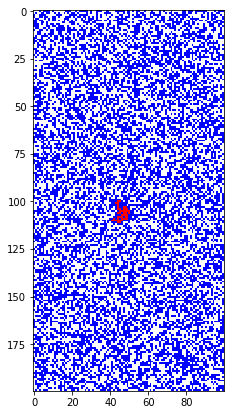

0.009989012086704625 % knew the rumor/information at the end of 100 days now


In [114]:
the_city=making_a_city(200, 100, 0.50)
startRumor(the_city)
spread_rumor(the_city, 100)

print(100*(np.count_nonzero(the_city == 2)/(np.count_nonzero(the_city == 1)+np.count_nonzero(the_city == 2))),"% knew the rumor/information at the end of 100 days now")

**Do This:** Now run the same simulation but with a people denisty of 60%. Comment on the results similar to you did with a density of 40% and 50%. Does this result make more or less sense than the previous model? What does it tell you about this model for information spread? Did the model finish running, or was 100 iterations not enough time?

The result make more sense with higher density.

The results tell me that the more people in a place the more the rumor spread in that place

I think 100 iterations is not enough 

**Do This:** Run the above for a range of people densities from 5 - 100% in increments of 5%. **This is going to take a little while to run.** We are going to try and figure out the "tipping point" of our model. This is the point where the behavior drastically changes. Instead of running our model for some set number of iterations, we are going to run each model until the model finishes, which we will determine by comparing the copy we make at the beginnning of an iteration and make changes to the and the original city/board. For each model, we want to keep track of the percentage of people who know the rumor/information by the time the model finishes running. Here is the pseudocode for this part of the assignment:

```
make a list to store the percentage of people who know the rumor/info

for each density in range 0.05 - 1.00 (5% to 100%) in steps of 5% (0.05):

    run the simulation where we let the rumor/simulation spread
    until the simulation is done, or no new spread occurs 
    from 1 iteration to the next
    
    
    calculate the percentage of people who know the rumor/information
    when the model is done running and save it
```

Once you have implemented this, make a plot of the percentage of people who knew the rumor/information at the end of the simulation for each density of people in the city/board.

**Comment on where you think the tipping point is (what density of people does the percentage of people who know the rumor/information at the end of the simulation suddenly change considerably?)**. Because this takes a little while to run, you might want to include a print statement to let you know what density you're currently modeling so you know the progress of your code. If your computer is having trouble running this, try running it on JupyterHub!

The tipping point is in the density 0.2 

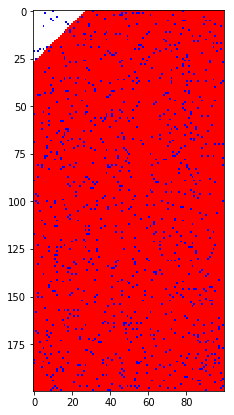

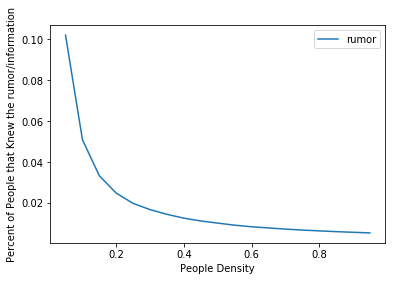

In [115]:
people_who_know_rumor=[]
d=np.arange(0.05,1,0.05)

for i in d:
    the_city=making_a_city(200, 100, i)
    startRumor(the_city)
    spread_rumor(the_city, 100)
    
    people_who_know_rumor.append(100*(np.count_nonzero(the_city == 2)/(np.count_nonzero(the_city == 1)+np.count_nonzero(the_city == 2))))

plt.plot(d, people_who_know_rumor, label="rumor/information")
plt.xlabel("People Density")
plt.ylabel("Percent of People that Knew the rumor/information")
plt.legend(loc="best")

---
# 2. Improving the model (8 points)

What you should have observed in the previous model is that our city/board needed to be sufficiently dense in order for the information/rumor to spread very far. This is not realistic because we know information can spread quickly even when there are not a lot of people there to spread it (based on anecdotal evidence). Our model is behaving differently than we would expect it to. There could be many reasons behind this, such as how our board was initially set up, but one of the predominant is the way we allow information to travel. Right now, we are limiting the spread to a Von Neumann neighborhood, which again looks like the following:

<img src="https://i.imgur.com/TwcKZ0D.png" alt="vonneumann">

but a _more_ realistic model would have us searching what is called a [Moore Neighborhood](https://en.wikipedia.org/wiki/Moore_neighborhood). A Moore neighborhood looks at the agents diagonal to an individual. A diagram of this is shown below: 

<img src="https://i.imgur.com/1mPhsZ7.png" alt="moore">

We are going to extend our model to now include a more robust neighborhood search.

**Question:** What effect do you think this will have on our results? Do you think it will make any kind of a difference? Does this model seem more realistic? Why or why not?

we will have better resultds because we will also analyze the neighbor in the diagonal

**Do This:** Modify your `getNeighborValues` function to now return the values of a Moore neighborhood instead of a Von Neumann. Instead of changing your function at the beginning of this notebook, **you should copy and paste that function here and modify it below**. This way, when you go to rerun your code, earlier parts of this assignment will use that version of the `getNeighborValues` function and later parts will use the new version.

In [116]:
def getNeighborValues(i, j, board):
    '''
    Function to get the **values** for the neighborhood of a given
    agent at [i,j]
    '''
    neighborhood_indices = [(i-1,j),(i,j-1),(i+1,j),(i,j+1), (i-1,j-1), (i-1, j+1), (i+1,j-1), (i+1, j+1)]
    
    ## We want to go through all of the indices and store the
    ## values in those locations as long as they are _on the board_
    neighborhood_values = []
    
    for index in neighborhood_indices:
        # Put your code here
        if onBoard(index[0],index[1],board):
            neighborhood_values.append(board[index])
    
    return neighborhood_values

**Do This:** Now, that we have updated our model (a somewhat small change), let's run a sample model to see what the difference is. Initialize a city/board with a density of people on it of 40%. Run the simulation _until it finishes_ (not for 100 iterations or a different set number). 

**What percentage of people knew the rumor/information by the end of the simulation? How did that compare to the percent of people who knew when we only used a Von Neumann neighborhood? Which do you think is more realistic?**

0.012410027302060065

the new model is more realistic

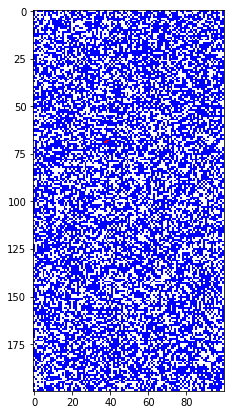

0.012410027302060065 % knew the rumor/information at the end of 100 days now


In [123]:
the_city=making_a_city(200, 100, 0.40)
startRumor(the_city)
spread_rumor(the_city)

print(100*(np.count_nonzero(the_city == 2)/(np.count_nonzero(the_city == 1)+np.count_nonzero(the_city == 2))),"% knew the rumor/information at the end of 100 days now")

**Do This:** Find the tipping point of this new model using the same method we used with the old model. 

**Did the tipping point change dramatically or not? How can we interpret the difference in tipping points between the two models?**

This will probably take a similarly long time to run.

_Put your answers to the above questions here._

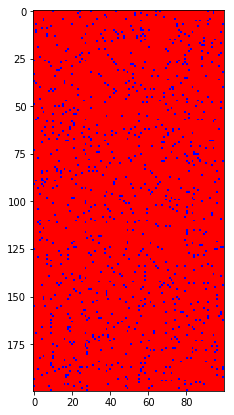

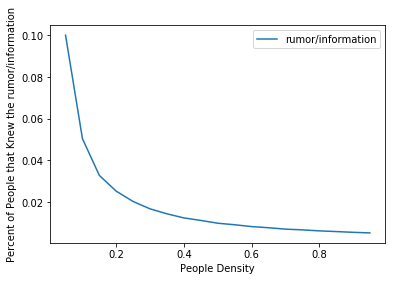

In [124]:
people_who_know_rumor=[]
d=np.arange(0.05,1,0.05)

for i in d:
    the_city=making_a_city(200, 100, i)
    startRumor(the_city)
    spread_rumor(the_city)
    
    people_who_know_rumor.append(100*(np.count_nonzero(the_city == 2)/(np.count_nonzero(the_city == 1)+np.count_nonzero(the_city == 2))))

plt.plot(d, people_who_know_rumor, label="rumor/information")
plt.xlabel("People Density")
plt.ylabel("Percent of People that Knew the rumor/information")
plt.legend(loc="best")

---
# 3. Wrap Up (3 points)

**Do This:** After building these two models, what conclusions have you reached? Which one makes more sense if we are trying to build a "realistic" model? 

The second one make more sense because it analize all the neighbor! I conclued that the more people around the more the rumor/spread

**Do This:** Can you think of scenarios where one may be more appropriate than the other?

One can be useful for rumor spread between houses and the one people in a place with many people

**Do This:** What are some ways that this model could be made better? Are there different neighborhoods you could look at? What about more complex rules (e.g., not everyone _always_ shares the information with the person next to them?)?

We could analize if the neighbor get in contact or know each other

## Congrats!

You're done with the parts of this assignment that are required! If you want to try to earn some extra points, work on Part 4 below. Otherwise, jump down to the assignment survey, fill it out, and submit your solutions to D2L!

---
# 4. Bonus: Challenge Problem (4 bonus points)

As an extra challenge problem, we will be further adding on to our model. Completing this portion of the assignment is worth XX extra credit points. In order to make this model even more complex, we are going to introduce _two_ new elements. The first is an improved neighborhood. We have now modeled a Von Neumann neighborhood and a Moore neighborhood. In this next part, we will be using a hybrid neighborhood shown below: 

<img src="https://i.imgur.com/aaoUTzR.png" alt="hybrid">


This may look complex, but let's break this down and rationalize why we might want to model the spread of information this way. For an individual in our city at location `array[i,j]`, they are surrounded by 8 other individuals which we have already described as a Moore neighborhood. We can think of these individuals as their _immediate neighbors_, the people or locations they are the closest to. When individuals talk to one another, we can safely assume that they probably want to talk to the people who are close to them. However, everyone is familiar with the concept of eavesdropping; sometimes you just can't help but overhear the conversations that those around you are having. The individuals who are further away than the Moore neighborhood but still close enough to overhear the conversation comprise what we will refer to as the _extended neighborhood_. A labeled diagram for this is shown below.

<img src="https://i.imgur.com/Fn1luNN.png" alt="boxed">

We don't include other individuals in the extended neighborhood because we are making a simplifying assumption that they are too far out of earshot to be able to accurately understand what is being discussed. 

Now, the difference in distance from the individual who knows the information at `array[i,j]` outlines the need for the second change we will make to this model: if you are further away from the individual who is talking, shouldn't it be less likely for you to overhear what it is they are talking about? Also, should the individual at `array[i,j]` want to talk to _everyone_ that is around them? In many social situations, some people choose to talk to a subset of those around them either due to friendships or familiarity. We are going to introduce two _new_ rules to our model as a result of this.

**In addition to changing the shape of the neighbor, we're also going to change the way in which agents in our city decide to share the rumor:**

1. For any given individual in the _immediate neighborhood_ of `array[i,j]` there is an $\alpha$ chance that they will talk and exchange information. $\alpha$ is a parameter of this model that we can vary. For lower levels of $\alpha$, it is less likely for the individual at `array[i,j]` to talk to each of its neighbors. A higher value of $\alpha$ means that `array[i,j]` is very likely to share information with each individual around them. We can think of $\alpha$ as a general description for how talkative people in our model are. 

2. For each individual in the _extended neighborhood_ of the individual at `array[i,j]`, there is a $\beta$ chance of them overhearing the conversation that `array[i,j]` is having with someone else. $\beta$ can be thought of as how intently others are listening to conversations around them. 

Since we haven't talked about random number generation in class yet, we will provide the code for you to take care of this part; however, you will need to do the rest. 

**In order to complete this part of the assignment**, you will need to:
1. Complete the new version of the `getNeighborhoodValues` function started for you below (note that the function now returns *two* lists, the immediate neighborhood and the extended neighborhood).
2. Make a city of size 100 x 100 and a people density of 40%. Start the rumor using the `startRumor` function and establish values of $\alpha$ and $\beta$.
3. Finish the code for running the simulation we have provided below. You should make an _animation_ of this simulation so we can see it updating in real time.
4. Write a short paragraph where you explain your model's behavior. What new behavior did you notice? What effect did the new neighborhood have on the results? Were some individuals in the city still unaware of the rumor/information by the end of the simulation? Spend some time discussing the results of your model and highlighting any interesting things that you note.

In [126]:
## Finish this new version of the getNeighborValues function!
def getNeighborValues(i, j, board):
    immediate_neighborhood = [(i-1,j),(i,j-1),(i+1,j),(i,j+1),(i-1,j-1),(i-1,j+1),(i+1,j-1),(i+1,j+1), (i-2,j), (i,j-2), (i+2,j), (i, j+2)]
    extended_neighborhood = []
    
    immediate_neighbors_on_board = []
    for index in immediate_neighborhood:
        if onBoard(index[0], index[1],board):
            immediate_neighbors_on_board.append(board[index[0], index[1]])
    
    return immediate_neighbors_on_board, extended_neighborhood

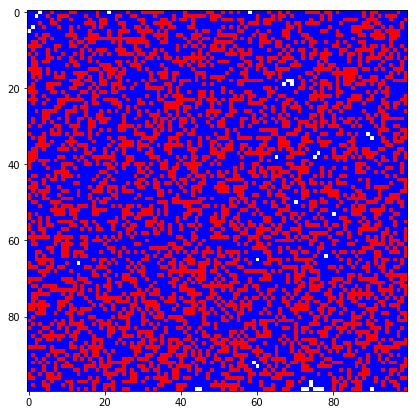

Simulation complete in 116 iterations


In [133]:
## Finish this code to run the simulation!
ALPHA = 0.3
BETA = 0.7

city=making_a_city(100, 100, 0.40)
startRumor(city)

d = 0
while True:
    d += 1
    new_city = city.copy()
    for i in range(city.shape[0]):
        for j in range(city.shape[1]):
            if city[i,j] == 1:
                immediate_neighbor_values, extended_neighbor_values = getNeighborValues(i,j,city)
                
                for neigbor in immediate_neighbor_values:
                    ##We generate a random number to simulate the random
                    ##chance of people interacting. Don't worry about this
                    ##too much yet. Just set the value of ALPHA above and 
                    ##assume it is working appropriately.
                    if neigbor == 2 and random.uniform(0,1) < ALPHA:
                        new_city[i,j] = 2
                        
               ## What about the extended neighborhood?
    
    if np.all(new_city == city):
        print("Simulation complete in {} iterations".format(d))
        break
    else:
        city = new_city
        
    ##Uncomment to show simulation when everything is working
    fig = plt.figure(figsize = (12,7))
    plt.imshow(city, cmap="bwr")
    time.sleep(0.2)
    clear_output(wait=True) # Clear output for dynamic display
    display(fig)            # Reset display
    fig.clear()             # Prevent overlapping and layered plots
    plt.close();

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [125]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://goo.gl/forms/VGwPkEH03QOHHh8c2" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

---

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Homework Assignments" folder, find the dropbox link for Homework #4, and upload it there.